In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/house-prices-advanced-regression-techniques/sample_submission.csv
/kaggle/input/house-prices-advanced-regression-techniques/data_description.txt
/kaggle/input/house-prices-advanced-regression-techniques/train.csv
/kaggle/input/house-prices-advanced-regression-techniques/test.csv


## Obtenemos los datos

In [2]:
train = pd.read_csv("/kaggle/input/house-prices-advanced-regression-techniques/train.csv")

In [ ]:
train.head()

In [3]:
test = pd.read_csv("/kaggle/input/house-prices-advanced-regression-techniques/test.csv")

In [ ]:
test.head()

In [ ]:
train.columns

In [ ]:
train.shape # Vemos la cantidad de filas y columnas

In [4]:
# Obtenemos las columnas que tiene mas del 80 % de nulos
def columnas_nulos():

    train_columns = train.columns

    columnas = [col for col in train_columns if train[col].isna().sum() > 1168 ]

    return columnas

In [5]:
drop_col = columnas_nulos()
drop_col

['Alley', 'PoolQC', 'Fence', 'MiscFeature']

In [6]:
# Eliminamos las columnas que tienen el 80% de nulos
train.drop(columns=drop_col,inplace=True)

In [7]:
#Eliminamos columna MasVnrType
train.drop(columns=['MasVnrType'] , inplace = True)

In [8]:
# checamos si hay ID's repetidos
train.duplicated().sum()

0

In [ ]:
train.info()

In [9]:
train.drop(columns='FireplaceQu',inplace=True)

In [16]:
train_numeric = train.select_dtypes(include=['int','float'])

In [17]:
train_numeric.columns

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

In [ ]:
train_numeric.head()

In [12]:
# Contar ceros en cada columna
conteo_ceros = (train_numeric == 0).sum()
conteo_ceros

Id                  0
MSSubClass          0
LotFrontage         0
LotArea             0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
MasVnrArea        861
BsmtFinSF1        467
BsmtFinSF2       1293
BsmtUnfSF         118
TotalBsmtSF        37
1stFlrSF            0
2ndFlrSF          829
LowQualFinSF     1434
GrLivArea           0
BsmtFullBath      856
BsmtHalfBath     1378
FullBath            9
HalfBath          913
BedroomAbvGr        6
KitchenAbvGr        1
TotRmsAbvGrd        0
Fireplaces        690
GarageYrBlt         0
GarageCars         81
GarageArea         81
WoodDeckSF        761
OpenPorchSF       656
EnclosedPorch    1252
3SsnPorch        1436
ScreenPorch      1344
PoolArea         1453
MiscVal          1408
MoSold              0
YrSold              0
SalePrice           0
dtype: int64

In [18]:
train_numeric.columns

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

In [19]:
#Eliminamos columnas con mas de 80% cantidad de ceros

train_numeric.drop(columns=['LowQualFinSF','BsmtHalfBath','HalfBath','EnclosedPorch','3SsnPorch','3SsnPorch','ScreenPorch','PoolArea','MiscVal'],inplace=True)

# Obtenemos las columnas no numericas y aplicamos one hot encoding para pasar a numericos 

In [21]:
train_object = train.select_dtypes(include=['object'])

In [22]:
train_object['Sales'] = train_numeric['SalePrice']

In [23]:
from sklearn.model_selection import KFold

In [24]:
# Columnas que usaran K-Fold Target Encoding
lista_tarEncoding = ["MSZoning", "Utilities", "Neighborhood", "Condition1", "Condition2", "BldgType", "HouseStyle", "RoofStyle", "RoofMatl", "Exterior1st", "Exterior2nd",  "Foundation", "BsmtFinType1", "Heating", "Electrical", "Functional", "GarageType", "SaleType", "SaleCondition"]

In [25]:
# Numero de pliegues (folds)
n_splits = 3
kf = KFold(n_splits=n_splits,shuffle=True,random_state=42)

In [26]:
# Crear un nuevo DataFrame para almacenar las columnas codificadas
train_object_encoded = train_object.copy()

In [27]:
# FUncion para aplicar K-Fold Trget Encoding a una columna categorica

def kfold_target_encoding (df,column , target,kf):
    encoded_column = np.zeros(len(df))

    for train_idx , val_idx in kf.split(df):
        train_data , val_data = df.iloc[train_idx],df.iloc[val_idx]


        #Calcula la media de la variable objetivo por categoria en el conjunto de entrenamiento

        target_means = train_data.groupby(column)[target].mean()

        # Asignar la media al conjunto de validación
        encoded_column[val_idx] = val_data[column].map(target_means)
    
    return encoded_column



In [28]:
# Aplicar K-Fold Target Encoding a todas las columnas categóricas
for column in lista_tarEncoding:
    encoded_col_name = f"{column}_encoded"
    train_object_encoded[encoded_col_name] = kfold_target_encoding(train_object, column, 'Sales', kf)


In [29]:
train_object_encoded.drop(columns=lista_tarEncoding, inplace=True , axis=1) # Borramos las columnas originales

In [31]:
#Borramos columnas que nos osn target encoding
train_object_encoded.drop(columns=['Street', 'LotShape', 'LandContour', 'LotConfig', 'LandSlope',
       'ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
       'BsmtFinType2', 'HeatingQC', 'CentralAir', 'KitchenQual', 
       'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 
       'Sales'] , inplace=True , axis=1)

In [32]:
train_object_encoded.head()

,MSZoning_encoded,Utilities_encoded,Neighborhood_encoded,Condition1_encoded,Condition2_encoded,BldgType_encoded,HouseStyle_encoded,RoofStyle_encoded,RoofMatl_encoded,Exterior1st_encoded,Exterior2nd_encoded,Foundation_encoded,BsmtFinType1_encoded,Heating_encoded,Electrical_encoded,Functional_encoded,GarageType_encoded,SaleType_encoded,SaleCondition_encoded
0,190075.623711,180286.591984,195712.000000,183242.180851,180432.519710,185298.67750,210728.861592,171267.445910,179099.565762,213023.426829,214220.062696,224471.147887,234123.513011,180991.692872,185916.272523,182790.726269,201781.720971,173117.712085,174602.518285
1,191586.845347,181410.191161,226333.333333,139504.301887,181820.546778,185839.87846,174963.073375,171264.509753,179992.259958,148083.044118,148602.177778,148408.338095,160823.784722,182905.788038,187897.689539,183931.185510,203969.925676,173307.550535,175560.167910
2,190075.623711,180286.591984,195712.000000,183242.180851,180432.519710,185298.67750,210728.861592,171267.445910,179099.565762,213023.426829,214220.062696,224471.147887,234123.513011,180991.692872,185916.272523,182790.726269,201781.720971,173117.712085,174602.518285
3,190075.623711,180286.591984,215912.848485,183242.180851,180432.519710,185298.67750,210728.861592,171267.445910,179099.565762,152460.449275,169540.740741,133268.924731,162641.833333,180991.692872,185916.272523,182790.726269,133615.558052,173117.712085,148066.716216
4,191586.845347,181410.191161,350294.740741,185221.861244,181820.546778,185839.87846,214223.744966,171264.509753,179992.259958,215945.862464,215872.401163,228354.697941,239839.000000,182905.788038,187897.689539,183931.185510,203969.925676,173307.550535,175560.167910


# Conversion de datos con Ordinal Encoding

In [33]:
from sklearn.preprocessing import OrdinalEncoder

In [34]:
# Lista de las categorias a transformar con Ordinal Encoding
lista_OrEncoding = ["LotShape", "LandSlope", "ExterQual", "ExterCond", "BsmtQual", "BsmtCond", "BsmtExposure", "BsmtFinType1", "BsmtFinType2", "HeatingQC", "KitchenQual", "GarageFinish", "GarageQual", "GarageCond", ]

In [36]:
# Crear el codificador ordinal instanciamos un objeto de OrdinalEncoder()
encoder = OrdinalEncoder()

In [38]:
# Hacemos una copia con las columnas que aplica el Ordinal Encoding
df_ordinalEncoding = train_object[lista_OrEncoding].copy()

In [39]:
# Aplicar el Ordinal Encoding a las columnas categóricas
df_ordinalEncoding[lista_OrEncoding] = encoder.fit_transform(df_ordinalEncoding[lista_OrEncoding])


In [40]:
df_ordinalEncoding.head()

,LotShape,LandSlope,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,HeatingQC,KitchenQual,GarageFinish,GarageQual,GarageCond
0,3.0,0.0,2.0,4.0,2.0,3.0,3.0,2.0,5.0,0.0,2.0,1.0,4.0,4.0
1,3.0,0.0,3.0,4.0,2.0,3.0,1.0,0.0,5.0,0.0,3.0,1.0,4.0,4.0
2,0.0,0.0,2.0,4.0,2.0,3.0,2.0,2.0,5.0,0.0,2.0,1.0,4.0,4.0
3,0.0,0.0,3.0,4.0,3.0,1.0,3.0,0.0,5.0,2.0,2.0,2.0,4.0,4.0
4,0.0,0.0,2.0,4.0,2.0,3.0,0.0,2.0,5.0,0.0,2.0,1.0,4.0,4.0


### Ahora juntamos los data frames df_ordinalEncoding y train_object_encoded

In [41]:
df_NoNumeric = pd.concat([df_ordinalEncoding,train_object_encoded],axis=1)

## EDA

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objs as go
from plotly.subplots import make_subplots

## Grafica de la distribucion de precios de las casas por año construido

In [ ]:
# Crear una columna para los rangos
train_numeric['rango'] = pd.cut(train_numeric['SalePrice'], bins=[0, 100000, 200000, 300000,400000,500000,600000,700000], labels=['1', '2', '3','4','5','6','7'])




In [ ]:
sns.scatterplot(x='YearBuilt',y='SalePrice',data=train_numeric,hue='rango', palette='Set1')
plt.show()

## Grafica de la distribucion del precio de las casa por area

In [ ]:
# Crear una columna para los rangos
train['rango'] = pd.cut(train['SalePrice'], bins=[0, 100000, 200000, 300000,400000,500000,600000,700000], labels=['1', '2', '3','4','5','6','7'])




In [ ]:
sns.scatterplot(x='LotArea',y='SalePrice',data=train_numeric,hue='rango', palette='Set1')
plt.show()

## Grafica de precios de hogares por total de habitaciones

In [ ]:
sns.scatterplot(x='TotRmsAbvGrd',y='SalePrice',data=train_numeric,hue='rango', palette='Set1')
plt.show()

## Grafica del numero de hogares por precio

In [ ]:

sns.countplot(data=train_numeric, x='rango', palette='viridis')
plt.xlabel('rango')
plt.ylabel('Numero de casas')
plt.show()

## Grafica numero de hogares por zona

In [ ]:

sns.countplot(data=train, x='MSZoning', palette='viridis')
plt.xlabel('Tipo de zona')
plt.ylabel('Numero de casas')
plt.show()

## Grafica de precios segun la zona

- A	Agriculture

- C	Commercial

- FV	Floating Village Residential

- I	Industrial

- RH	Residential High Density

- RL	Residential Low Density

- RP	Residential Low Density Park 

- RM	Residential Medium Density


In [ ]:
sns.scatterplot(x='MSZoning',y='SalePrice',data=train,hue='rango', palette='Set1')
plt.show()

## Grafica de los precios segun las condiciones alrededor

- Artery	Adjacent to arterial street
- Feedr	Adjacent to feeder street	
- Norm	Normal	
- RRNn	Within 200' of North-South Railroad
- RRAn	Adjacent to North-South Railroad
- PosN	Near positive off-site feature--park, greenbelt, etc.
- PosA	Adjacent to postive off-site feature
- RRNe	Within 200' of East-West Railroad
- RRAe	Adjacent to East-West Railroad

In [ ]:
sns.scatterplot(x='Condition1',y='SalePrice',data=train,hue='rango', palette='Set1')
plt.show()

## Grafica de precios de lascasas segunel tipode vivienda

- 1Fam	Single-family Detached	
- 2FmCon	Two-family Conversion; originally built as one-family dwelling
- Duplx	Duplex
- TwnhsE	Townhouse End Unit
- TwnhsI	Townhouse Inside Unit

In [ ]:
sns.scatterplot(x='BldgType',y='SalePrice',data=train,hue='rango', palette='Set1')
plt.show()

## Grafica de precios segun el estilo de la casa

- 1Story	One story
- 1.5Fin	One and one-half story: 2nd level finished
- 1.5Unf	One and one-half story: 2nd level unfinished
- 2Story	Two story
- 2.5Fin	Two and one-half story: 2nd level finished
- 2.5Unf	Two and one-half story: 2nd level unfinished
- SFoyer	Split Foyer
- SLvl	Split Level

In [ ]:
sns.scatterplot(x='HouseStyle',y='SalePrice',data=train,hue='rango', palette='Set1')
# Mover la leyenda a una posición específica
plt.legend(title='Categoría', loc='upper right')  # Cambiar loc según sea necesario

plt.show()

## Entrenamiento del modelo Random Forest

In [42]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split,cross_val_score,learning_curve,cross_validate

In [ ]:
train_numeric.columns

In [43]:
columnas_train = ['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'GrLivArea', 'BsmtFullBath', 'FullBath', 'BedroomAbvGr', 'KitchenAbvGr',
       'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea',
       'WoodDeckSF', 'OpenPorchSF', 'MoSold', 'YrSold']

In [44]:
X = train_numeric[columnas_train]
Y = train_numeric['SalePrice']

In [45]:
X.isna().sum()

MSSubClass        0
LotFrontage     259
LotArea           0
OverallQual       0
OverallCond       0
YearBuilt         0
YearRemodAdd      0
MasVnrArea        8
BsmtFinSF1        0
BsmtFinSF2        0
BsmtUnfSF         0
TotalBsmtSF       0
1stFlrSF          0
2ndFlrSF          0
GrLivArea         0
BsmtFullBath      0
FullBath          0
BedroomAbvGr      0
KitchenAbvGr      0
TotRmsAbvGrd      0
Fireplaces        0
GarageYrBlt      81
GarageCars        0
GarageArea        0
WoodDeckSF        0
OpenPorchSF       0
MoSold            0
YrSold            0
dtype: int64

In [46]:
X = X.fillna(0)

In [47]:
X.isna().sum()

MSSubClass      0
LotFrontage     0
LotArea         0
OverallQual     0
OverallCond     0
YearBuilt       0
YearRemodAdd    0
MasVnrArea      0
BsmtFinSF1      0
BsmtFinSF2      0
BsmtUnfSF       0
TotalBsmtSF     0
1stFlrSF        0
2ndFlrSF        0
GrLivArea       0
BsmtFullBath    0
FullBath        0
BedroomAbvGr    0
KitchenAbvGr    0
TotRmsAbvGrd    0
Fireplaces      0
GarageYrBlt     0
GarageCars      0
GarageArea      0
WoodDeckSF      0
OpenPorchSF     0
MoSold          0
YrSold          0
dtype: int64

## Dividimos la data en train y test

In [52]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [53]:
# Instanciamos el modelo
random_model = RandomForestRegressor(n_estimators=100, random_state=42,max_features='sqrt',n_jobs=-1,oob_score=True)
random_model.fit(X_train,y_train)

RandomForestRegressor(max_features='sqrt', n_jobs=-1, oob_score=True,
                      random_state=42)

In [50]:
# vemos cuales son las caracteristicas mas rlevantes
# Obtener las importancias de las características
importances = random_model.feature_importances_

# Visualizar las importancias

feature_importances = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': importances
})

# Ordena el DataFrame por importancia descendente
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

# Imprime las características más importantes
print(feature_importances)

         Feature  Importance
3    OverallQual    0.158115
14     GrLivArea    0.127988
22    GarageCars    0.109632
23    GarageArea    0.072814
5      YearBuilt    0.065051
12      1stFlrSF    0.061446
11   TotalBsmtSF    0.061166
21   GarageYrBlt    0.043131
6   YearRemodAdd    0.034575
8     BsmtFinSF1    0.033037
2        LotArea    0.030589
16      FullBath    0.028086
13      2ndFlrSF    0.027563
20    Fireplaces    0.021668
1    LotFrontage    0.017365
19  TotRmsAbvGrd    0.016742
7     MasVnrArea    0.012543
25   OpenPorchSF    0.012059
10     BsmtUnfSF    0.011797
24    WoodDeckSF    0.009770
0     MSSubClass    0.009103
17  BedroomAbvGr    0.008456
4    OverallCond    0.006999
26        MoSold    0.006739
15  BsmtFullBath    0.006264
27        YrSold    0.003383
18  KitchenAbvGr    0.002472
9     BsmtFinSF2    0.001449


In [54]:
# Evaluamos
y_train_pred = random_model.predict(X_train)
y_test_pred = random_model.predict(X_test)

In [55]:
#oob_score_ es una estimación del rendimiento del modelo basado en las muestras OOB y puede proporcionar una medida de la precisión del modelo sin necesidad de un conjunto de validación separado.
print(f"OOB Score: {random_model.oob_score_}")

OOB Score: 0.8433267690819586


In [56]:

# Calcular métricas
mse = mean_squared_error(y_test, y_test_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_test_pred)
r2 = r2_score(y_test, y_test_pred)

# Mostrar métricas
print(f"MSE: {mse:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"MAE: {mae:.2f}")
print(f"R^2: {r2:.2f}")

MSE: 833120913.91
RMSE: 28863.83
MAE: 17446.13
R^2: 0.89


## Predecimos con el DataFrame de test

In [ ]:
X_Test = test[X_train.columns]
X_Test = X_Test.fillna(0)

In [ ]:
Y_Test_pred = random_model.predict(X_Test)

In [ ]:
test.shape

In [ ]:
len(Y_Test_pred)

In [ ]:
output = pd.DataFrame({'Id': test.Id, 'SalePrice': Y_Test_pred})
output.to_csv('submission.csv', index=False)
print("Your submission was successfully saved!")

## Tratamos de mejorar el modelo RandomForest mejorando sus hiperparametros

In [57]:
from sklearn.model_selection import GridSearchCV

In [58]:
# Definir la rejilla de hiperparámetros
param_grid = {
    'n_estimators': [50, 100, 200],            # Número de árboles
    'max_depth': [None, 10, 20, 30],          # Profundidad máxima
    'min_samples_split': [2, 5, 10],          # Min muestras para dividir
    'min_samples_leaf': [1, 2, 4],            # Min muestras en una hoja
    'max_features': ['sqrt', 'log2']          # Número de características
}

In [59]:
# Configurar GridSearchCV
grid_search = GridSearchCV(
    estimator=RandomForestRegressor(random_state=42),
    param_grid=param_grid,
    cv=5,  # Validación cruzada con 5 pliegues
    scoring='neg_mean_squared_error',  # Métrica para evaluar
    n_jobs=-1  # Usar todos los núcleos
)

In [60]:
#Extraemos las columnas que solo son tipo int
columna_enteras = X_train.select_dtypes(include=['int'])

In [61]:
# Convertimoslascolumnas de int a float
X_train[columna_enteras.columns] = X_train[columna_enteras.columns].astype(float)

In [62]:
# Validamos si se convertieron los int a float
X_train.dtypes

MSSubClass      float64
LotFrontage     float64
LotArea         float64
OverallQual     float64
OverallCond     float64
YearBuilt       float64
YearRemodAdd    float64
MasVnrArea      float64
BsmtFinSF1      float64
BsmtFinSF2      float64
BsmtUnfSF       float64
TotalBsmtSF     float64
1stFlrSF        float64
2ndFlrSF        float64
GrLivArea       float64
BsmtFullBath    float64
FullBath        float64
BedroomAbvGr    float64
KitchenAbvGr    float64
TotRmsAbvGrd    float64
Fireplaces      float64
GarageYrBlt     float64
GarageCars      float64
GarageArea      float64
WoodDeckSF      float64
OpenPorchSF     float64
MoSold          float64
YrSold          float64
dtype: object

In [63]:
# Convertimos y_train a float
y_train = y_train.astype(float)

In [64]:
y_train.dtype

dtype('float64')

In [65]:
# Entrenar GridSearchCV
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20, 30],
                         'max_features': ['sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]},
             scoring='neg_mean_squared_error')

In [66]:
 #Obtener los mejores parámetros y evaluar el modelo
best_rf = grid_search.best_estimator_
best_rf

RandomForestRegressor(max_depth=20, max_features='sqrt', min_samples_leaf=2,
                      n_estimators=50, random_state=42)

In [68]:
# Hacer predicciones sobre el conjunto de prueba
y_test_pred = best_rf.predict(X_test_t)

In [71]:
# Calcular métricas
mse = mean_squared_error(y_test, y_test_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_test_pred)
r2 = r2_score(y_test, y_test_pred)

# Mostrar métricas
print(f"MSE: {mse:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"MAE: {mae:.2f}")
print(f"R^2: {r2:.2f}")

MSE: 903056846.60
RMSE: 30050.90
MAE: 17669.71
R^2: 0.88


# Prediccion juntando columnas numericas y no numericas

In [86]:
columnas_train_numeric = ['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'GrLivArea', 'BsmtFullBath', 'FullBath', 'BedroomAbvGr', 'KitchenAbvGr',
       'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea',
       'WoodDeckSF', 'OpenPorchSF', 'MoSold', 'YrSold']

In [129]:
X = train_numeric[columnas_train_numeric]

In [134]:
X = X.fillna(0)

In [151]:
df_NoNumeric = df_NoNumeric.fillna(0)

In [135]:
X_best = X[['OverallQual','GrLivArea','GarageCars','GarageArea','YearBuilt']]

In [152]:
df_final = pd.concat([df_NoNumeric,X_best,train_numeric[['SalePrice']]],axis=1)


# Normalizamos el data set escalandolo

In [88]:
from sklearn.preprocessing import StandardScaler

In [89]:
scaler = StandardScaler()

In [153]:
df_final_scaled = scaler.fit_transform(df_final)

In [154]:
df_final = pd.DataFrame(df_final_scaled,columns=df_final.columns)

In [155]:
df_final.head()

,LotShape,LandSlope,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,HeatingQC,...,Functional_encoded,GarageType_encoded,SaleType_encoded,SaleCondition_encoded,OverallQual,GrLivArea,GarageCars,GarageArea,YearBuilt,SalePrice
0,0.750731,-0.225716,-0.777976,0.364207,-0.220134,0.329367,0.668150,-0.357908,0.348323,-0.884658,...,0.168167,0.483282,-0.251585,-0.217284,0.651479,0.370333,0.311725,0.351000,1.050994,0.347273
1,0.750731,-0.225716,0.663451,0.364207,-0.220134,0.329367,-1.015196,-1.437547,0.348323,-0.884658,...,0.266464,0.523006,-0.245202,-0.184826,-0.071836,-0.482512,0.311725,-0.060731,0.156734,0.007288
2,-1.378933,-0.225716,-0.777976,0.364207,-0.220134,0.329367,-0.173523,-0.357908,0.348323,-0.884658,...,0.168167,0.483282,-0.251585,-0.217284,0.651479,0.515013,0.311725,0.631726,0.984752,0.536154
3,-1.378933,-0.225716,0.663451,0.364207,0.858376,-2.214948,0.668150,-1.437547,0.348323,0.265476,...,0.168167,-0.754188,-0.251585,-1.116679,0.651479,0.383659,1.650307,0.790804,-1.863632,-0.515281
4,-1.378933,-0.225716,-0.777976,0.364207,-0.220134,0.329367,-1.856868,-0.357908,0.348323,-0.884658,...,0.266464,0.523006,-0.245202,-0.184826,1.374795,1.299326,1.650307,1.698485,0.951632,0.869843


In [156]:
X_final = df_final.copy()
X_final.drop(columns=['SalePrice'],inplace=True)


In [157]:
X_final.head()

,LotShape,LandSlope,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,HeatingQC,...,Electrical_encoded,Functional_encoded,GarageType_encoded,SaleType_encoded,SaleCondition_encoded,OverallQual,GrLivArea,GarageCars,GarageArea,YearBuilt
0,0.750731,-0.225716,-0.777976,0.364207,-0.220134,0.329367,0.668150,-0.357908,0.348323,-0.884658,...,0.252493,0.168167,0.483282,-0.251585,-0.217284,0.651479,0.370333,0.311725,0.351000,1.050994
1,0.750731,-0.225716,0.663451,0.364207,-0.220134,0.329367,-1.015196,-1.437547,0.348323,-0.884658,...,0.350511,0.266464,0.523006,-0.245202,-0.184826,-0.071836,-0.482512,0.311725,-0.060731,0.156734
2,-1.378933,-0.225716,-0.777976,0.364207,-0.220134,0.329367,-0.173523,-0.357908,0.348323,-0.884658,...,0.252493,0.168167,0.483282,-0.251585,-0.217284,0.651479,0.515013,0.311725,0.631726,0.984752
3,-1.378933,-0.225716,0.663451,0.364207,0.858376,-2.214948,0.668150,-1.437547,0.348323,0.265476,...,0.252493,0.168167,-0.754188,-0.251585,-1.116679,0.651479,0.383659,1.650307,0.790804,-1.863632
4,-1.378933,-0.225716,-0.777976,0.364207,-0.220134,0.329367,-1.856868,-0.357908,0.348323,-0.884658,...,0.350511,0.266464,0.523006,-0.245202,-0.184826,1.374795,1.299326,1.650307,1.698485,0.951632


In [149]:
X_final.shape

(1460, 38)

In [158]:
Y_final = train_numeric[['SalePrice']]

In [159]:
X_train,X_test,Y_train,Y_test = train_test_split(X_final,Y_final,test_size=0.2,random_state=42)

In [160]:
# Instanciamos el modelo
random_model = RandomForestRegressor(max_depth=20, max_features='sqrt', min_samples_leaf=2,n_estimators=50, random_state=42)
random_model.fit(X_train,np.ravel(Y_train))

RandomForestRegressor(max_depth=20, max_features='sqrt', min_samples_leaf=2,
                      n_estimators=50, random_state=42)

In [161]:
# Evaluamos
y_test_pred = random_model.predict(X_test)
# Calcular métricas
mse = mean_squared_error(y_test, y_test_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_test_pred)
r2 = r2_score(y_test, y_test_pred)

# Mostrar métricas
print(f"MSE: {mse:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"MAE: {mae:.2f}")
print(f"R^2: {r2:.2f}")

MSE: 1242568378.19
RMSE: 35250.08
MAE: 20172.22
R^2: 0.84


## Modelo XGBOOST

In [120]:
from sklearn.model_selection import train_test_split,cross_val_score,learning_curve,cross_validate
import xgboost as xgb

In [162]:
# Crear el modelo XGBoost para regresión
model_xgb = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100, random_state=42)


In [163]:
# Entrenar el modelo
model_xgb.fit(X_train, Y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [164]:
# Realizar predicciones
y_pred_xgb = model_xgb.predict(X_test)

In [165]:
# Calcular métricas de evaluación
mae = mean_absolute_error(y_test, y_pred_xgb)
mse = mean_squared_error(y_test, y_pred_xgb)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred_xgb)

In [166]:
# Mostrar las métricas
print("Métricas de rendimiento del modelo:")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"R² Score: {r2:.4f}")

Métricas de rendimiento del modelo:
Mean Absolute Error (MAE): 19714.2196
Mean Squared Error (MSE): 1027876075.5002
Root Mean Squared Error (RMSE): 32060.5065
R² Score: 0.8660


# Ahora usamos Redes Neuronales

In [305]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input ,Dropout
from sklearn.model_selection import KFold, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold
from sklearn.metrics import mean_absolute_error,r2_score
from sklearn.pipeline import Pipeline

In [306]:
def build_model_regression(input_data):
    model = Sequential([Input(shape=(input_data.shape[1],)),
    Dense(128,activation='relu'),
    Dropout(0.5),
    Dense(64,activation='relu'),
    Dropout(0.5),
    Dense(32,activation='relu'),
    Dropout(0.2),
   Dense(1)])
    
    model.compile(optimizer='adam', loss='mse',metrics=['mae'])
    return model

In [298]:
scores=[]
r2=[]
all_history = []

In [222]:
X_train.shape[1]

38

# K-Fold automatico

In [307]:
# Inicializar KFold
kf = KFold(n_splits=5, shuffle=True, random_state=42)


# Ciclo de  cross-validation
for train_index, test_index in kf.split(X_train):
    X_train_fold, X_test_fold = X_train.iloc[train_index], X_train.iloc[test_index]#train_index lista de indices de set de entrenamiento
    y_train_fold, y_test_fold = Y_train.iloc[train_index], Y_train.iloc[test_index]

    model = build_model_regression(X_train)

    # Entrenamiento del modelo con el set de entrenamiento
    history = model.fit(X_train_fold, y_train_fold, epochs=400, batch_size =16,
                        validation_data = (X_test_fold, y_test_fold),
                        verbose=0)
    # prediccion con el set de test
    y_pred = model.predict(X_test_fold)

    # Calcular y almacenar el MAE
    scores.append(mean_absolute_error(y_test_fold, y_pred))

    #Calcular y almacenar r2
    r2.append(r2_score(y_test_fold, y_pred))


   
    all_history.append(history.history['val_mae'])


8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step


In [233]:
k = 4 # numero de folds
num_val_samples = len(X_train) // 4 # numero del tamano del conjunto de validacion
num_epoch = 70
all_history = [] # lista que almacena el historia del mse de cada epoca

# Kfold manual

In [313]:
for i in range(k):
    print("Fold " , i)

    #Conjunto de validacion -> 0 -101 , 101 - 202 , 202 - 303 , 303 -404
    val_data = X_train[i*num_val_samples: (i+1) * num_val_samples]
    val_targets = Y_train[i*num_val_samples: (i+1) * num_val_samples]

    #Conjunto de entrenamiento -> 101 - 404 , 0-101 - 202-404 , 0-202 - 303-404 , 0-303
    partial_train_data = np.concatenate(
    [X_train[:i * num_val_samples],
     X_train[(i+1) * num_val_samples:]],
     axis= 0
    )

    partial_train_targets = np.concatenate(
    [Y_train[:i * num_val_samples],
     Y_train[(i+1) * num_val_samples:]],
     axis= 0
    )
    model = build_model_regression(X_train)
    history = model.fit(partial_train_data, partial_train_targets, epochs=num_epoch, batch_size =16,
                        validation_data = (val_data, val_targets),
                        verbose=0)
    all_history.append(history.history['val_mae'])


    # prediccion con el set de test
    y_pred = model.predict(val_data)

    # Calcular y almacenar el MAE
    scores.append(mean_absolute_error(val_targets, y_pred))

    #Calcular y almacenar r2
    r2.append(r2_score(val_targets, y_pred))

Fold  0
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
Fold  1
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
Fold  2
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
Fold  3
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step


In [198]:
import matplotlib.pyplot as plt

In [308]:
# visulaizamos el hitory con un dataframe
# Se puede visualizar como va disminuyendo el mse conforme avanzan las epocas en cada fold
df = pd.DataFrame(all_history)
df

,0,1,2,3,4,5,6,7,8,9,...,390,391,392,393,394,395,396,397,398,399
0,183040.312500,182510.531250,178854.546875,165845.875000,135680.406250,91296.539062,62541.906250,54660.964844,50574.019531,48164.027344,...,21449.277344,20929.060547,21281.136719,21624.082031,21870.236328,21698.548828,21140.687500,21521.435547,21104.794922,21713.289062
1,178809.046875,177915.046875,171976.375000,151642.828125,110942.898438,65628.039062,55384.617188,51465.156250,48783.437500,46997.640625,...,22204.685547,21608.607422,21990.429688,22349.927734,21233.960938,21305.794922,21766.121094,22645.880859,21828.611328,21541.865234
2,185494.296875,185097.250000,182048.843750,170252.437500,141194.296875,96156.312500,68234.945312,58945.984375,54069.863281,50449.824219,...,27811.863281,27849.980469,28109.652344,28233.433594,27874.203125,27821.593750,28164.935547,28414.849609,28177.001953,28608.896484
3,178976.359375,178551.593750,175814.671875,165922.375000,142223.640625,102419.796875,66826.117188,56838.699219,53333.105469,50349.582031,...,22607.332031,23248.644531,23027.703125,22304.021484,22481.951172,22616.003906,22469.316406,22889.539062,22470.287109,23260.357422
4,180730.406250,180369.890625,177496.031250,167276.390625,141902.562500,100222.992188,70955.804688,61021.191406,55946.667969,52412.187500,...,21358.046875,20842.474609,20823.375000,20830.998047,20756.044922,20515.558594,20960.234375,21082.464844,20529.912109,21793.755859


In [309]:
# Obtenemos la media  de cada fold
all_mae_avg = df.mean(axis=0)
all_mae_avg

0      181410.084375
1      180888.862500
2      177238.093750
3      164187.981250
4      134388.760937
           ...      
395     22791.500000
396     22900.258984
397     23310.833984
398     22822.121484
399     23383.632812
Length: 400, dtype: float64

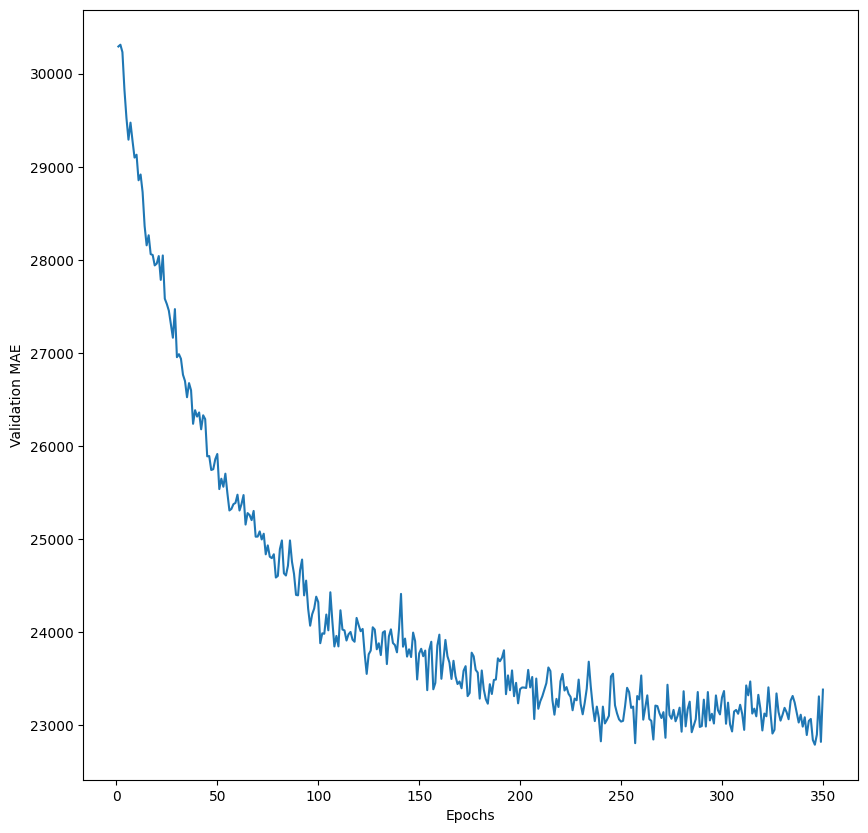

In [310]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(10,10))
plt.plot(range(1,len(all_mae_avg[50:])+1), all_mae_avg[50:])

plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()

In [311]:
#Promedio de scores y r2
average_neg_mse = np.mean(scores)
average_r2 = np.mean(r2)

print(f"Valor promedio de MAE Error Absoluto medio: {average_neg_mse}")
print(f"Valor promedio de r2: {average_r2}")

Valor promedio de MAE Error Absoluto medio: 23383.632461623863
Valor promedio de r2: 0.5481198985055565


In [289]:
scores

[21673.853999732906,
 22572.15680088141,
 27962.58024505876,
 22086.8366416309,
 21491.56994366953]

In [312]:
r2

[0.8429306567612544,
 0.736420410122103,
 -0.4643689695142288,
 0.8133518303790975,
 0.8122655647795565]